In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sk-learn models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, roc_auc_score, roc_curve, classification_report,accuracy_score
from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
df.isnull().sum().sum()

0

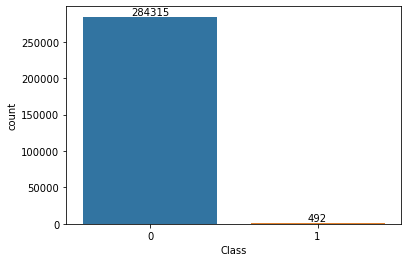

In [4]:
fig = sns.countplot(df.Class)
fig.bar_label(fig.containers[0], label_type='edge');

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Fraud maximum transaction amount is 2125.87.


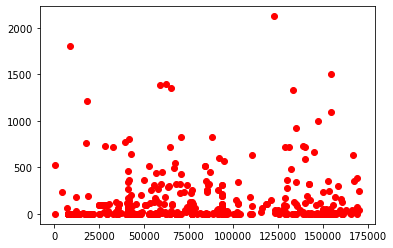

In [6]:
fraud = df[df['Class']==1]
plt.scatter(fraud['Time'],fraud['Amount'],c='red')
print('Fraud maximum transaction amount is {}.'.format(np.max(fraud['Amount'])))

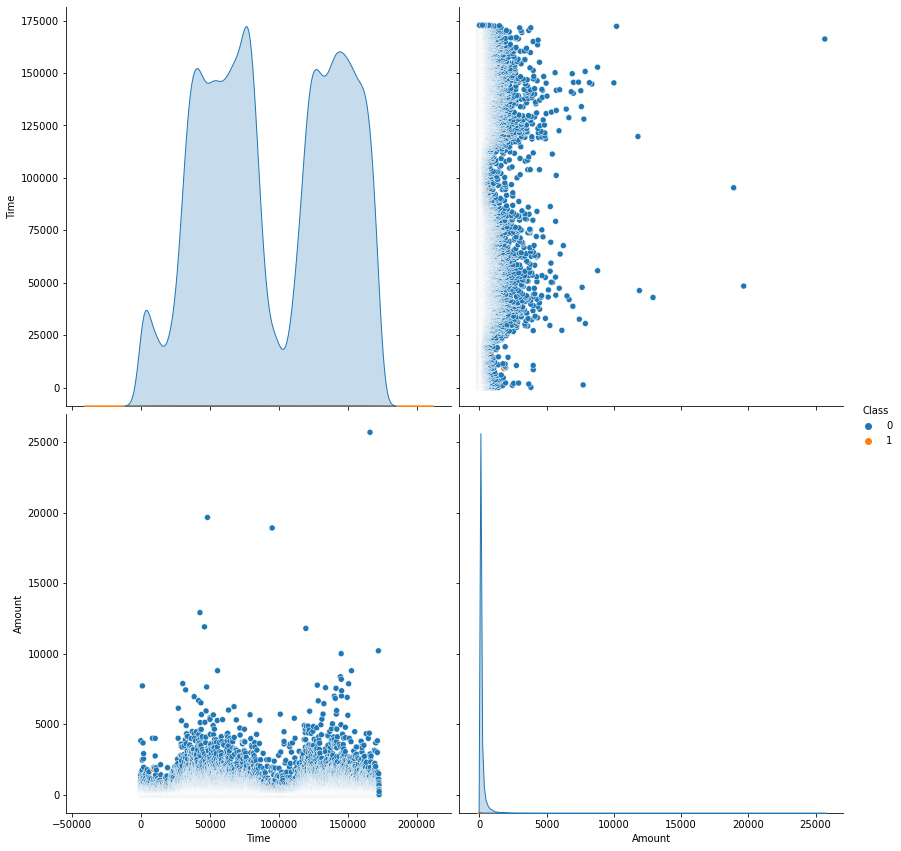

In [7]:
sns.pairplot(df[["Time", "Amount", "Class"]], hue="Class", height=6)
plt.show()

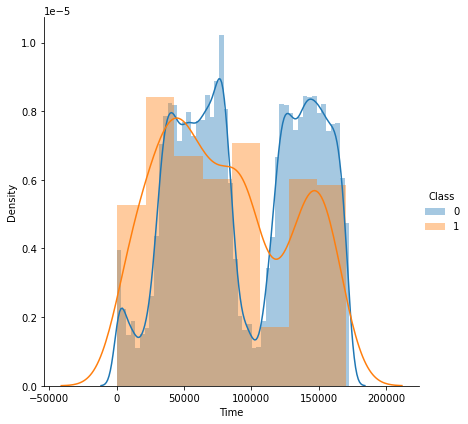

In [8]:
sns.FacetGrid(df[["Time", "Amount", "Class"]], hue="Class", size=6).map(sns.distplot,"Time").add_legend()
plt.show()

### Correlation

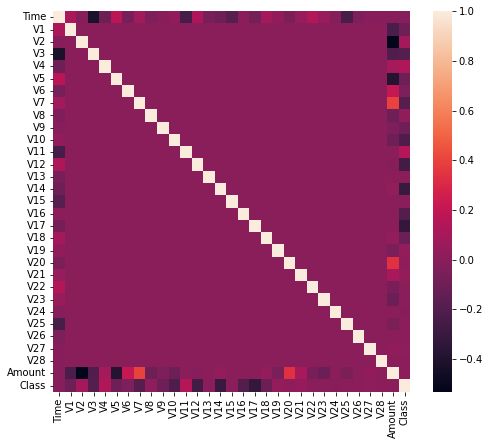

In [9]:
plt.figure(figsize=(8,7))
df_corr = df.corr()
sns.heatmap(df_corr);

In [10]:
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


### Create train and test DataFrames

In [11]:
X = df.drop(labels='Class', axis=1, inplace=False)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

### cross validation of all models

In [12]:
classifiers = {
    "KNN": KNeighborsClassifier(), 
    "LR": LogisticRegression(max_iter=1000), 
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "SVM": SVC(),
    "XGB": XGBClassifier()
}

results = dict()
for name, clf in classifiers.items():
    model = clf
    cv_results = cross_validate(
        model, X_train, y_train, cv=5,
        scoring=('accuracy')
    )

    results[name] = cv_results['test_score'].mean()
    
results

{'KNN': 0.9983748321919285,
 'LR': 0.9989867777525102,
 'DT': 0.9990168739348958,
 'RF': 0.9995034209789839,
 'SVM': 0.9982745130516516,
 'XGB': 0.9995234850586406}

### KNeighborsClassifier

In [13]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
knn_pred = knn.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
knn_roc = roc_auc_score(y_test, knn_pred)

### LogisticRegression

In [14]:
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_pred = lr.predict(X_test)
lr_acc = accuracy_score(y_test, lr_pred)
lr_roc = roc_auc_score(y_test, lr_pred)

### DecisionTreeClassifier

In [15]:
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_pred = dt.predict(X_test)
dt_acc = accuracy_score(y_test, dt_pred)
dt_roc = roc_auc_score(y_test, dt_pred)

### RandomForestClassifier

In [16]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_acc = accuracy_score(y_test ,rf_pred)
rf_roc = roc_auc_score(y_test ,rf_pred)

### Support Vector Machine

In [17]:
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)
svc_acc = accuracy_score(y_test, svc_pred)
svc_roc = roc_auc_score(y_test, svc_pred)

### XGBoost

In [18]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
xgb_pred = xgb.predict(X_test)
xgb_acc = accuracy_score(y_test, xgb_pred)
xgb_roc = roc_auc_score(y_test, xgb_pred)

## Evaluate all models
- Accuracy
- roc_auc_score

In [19]:
Table = PrettyTable(["Algorithm", "Accuracy"])
Table.add_row(["KNN", knn_acc])
Table.add_row(["LogisticRegression", lr_acc])
Table.add_row(["DecisionTreeClassifier", dt_acc])
Table.add_row(["RandomForestClassifier", rf_acc])
Table.add_row(["SVC", svc_acc])
Table.add_row(["xgboost", xgb_acc])
print(Table)

+------------------------+--------------------+
|       Algorithm        |      Accuracy      |
+------------------------+--------------------+
|          KNN           | 0.9984434067155882 |
|   LogisticRegression   | 0.9990871107053826 |
| DecisionTreeClassifier | 0.9991573329588147 |
| RandomForestClassifier | 0.9996137776061234 |
|          SVC           | 0.9982678510820079 |
|        xgboost         | 0.999602073897218  |
+------------------------+--------------------+


In [20]:
Table = PrettyTable(["Algorithm", "roc_auc_score"])
Table.add_row(["KNN", knn_roc])
Table.add_row(["LogisticRegression", lr_roc])
Table.add_row(["DecisionTreeClassifier", dt_roc])
Table.add_row(["RandomForestClassifier", rf_roc])
Table.add_row(["SVC", svc_roc])
Table.add_row(["xgboost", xgb_roc])
print(Table)

+------------------------+--------------------+
|       Algorithm        |   roc_auc_score    |
+------------------------+--------------------+
|          KNN           | 0.5506756756756757 |
|   LogisticRegression   | 0.8713871412886595 |
| DecisionTreeClassifier | 0.8984024442990385 |
| RandomForestClassifier | 0.9188661608440024 |
|          SVC           |        0.5         |
|        xgboost         | 0.9154877824656241 |
+------------------------+--------------------+


### Confusion matric of all models

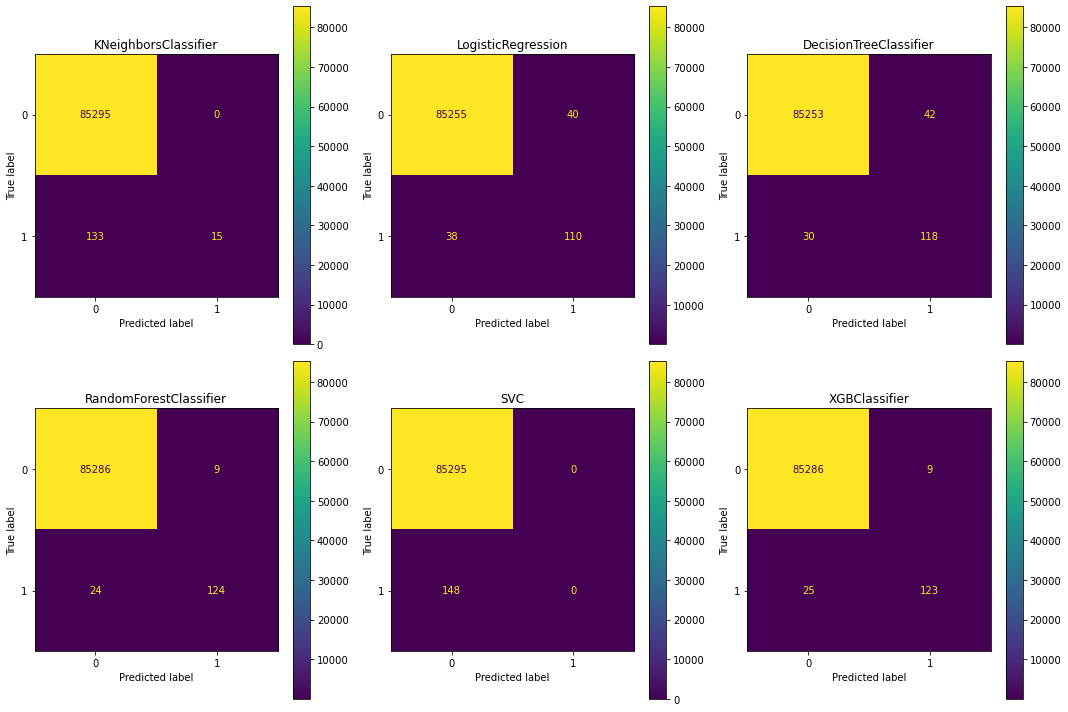

In [21]:
classifiers = [knn,lr,dt,rf,svc,xgb]
names = ('KNN','LogisticRegression','DecisionTreeClassifier','RandomForestClassifier','SVC','xgboost')
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15,10))

for cl, ax in zip(classifiers, axes.flatten()):
    plot_confusion_matrix(cl, 
                          X_test, 
                          y_test, 
                          ax=ax,
                          )
    ax.title.set_text(type(cl).__name__)
plt.tight_layout()  
plt.show()

###### In all of six models RandomForestClassifier has the best accuracy

In [22]:
#lets see RandomForestClassifier's classification report
print('RandomForestClassifier classification report')
print(classification_report(y_test,rf_pred))

RandomForestClassifier classification report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.93      0.84      0.88       148

    accuracy                           1.00     85443
   macro avg       0.97      0.92      0.94     85443
weighted avg       1.00      1.00      1.00     85443



# Conclusion
- There were used 6 models and in this case best accuracy has RandomForestClassifier, approximatly 99.96%
- Also we can see that RandomForestClassifier has lowest fals negative rate.
- Maximum fraude transaction is 2125.87, which is very low compared to normal Transactions.